# 1 1. 2-D Transforms

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import string

In [22]:
def saveto(filename):
    plt.savefig('LaTeX Report/figures/'+ filename)

def saveimg(filename, image):
    cv.imwrite('LaTeX Report/figures/'+ filename,image)

In [23]:
# points a, b and, c
a, b, c, d = (0, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 1)
# matrix with row vectors of points
P = np.array([a, b, c, d]).T

In [24]:
# Translation
t = 1 # translation along each axis
H = [[1,0,t],[0,1,t],[0,0,1]]
Pt = np.matmul(H, P)

In [25]:
# Rotation 
theta = np.pi/4 # Anti clockwise pi/4 rad rotation
H = [[np.cos(theta), -np.sin(theta), 0.], [np.sin(theta), np.cos(theta), 0.], [0., 0., 1.]]
Pt = np.matmul(H, P)

In [26]:
# Rotation + translation.(2D Euclidean transformation)
H = [[np.cos(theta), -np.sin(theta), t], [np.sin(theta), np.cos(theta), t], [0., 0., 1.]]
Pt = np.matmul(H, P)

In [27]:
# Scaled rotation (similarity transform)
s = 0.5
H = [[s*np.cos(theta), -s*np.sin(theta), t], [s*np.sin(theta), s*np.cos(theta), t], [0., 0., 1.]]
Pt = np.matmul(H, P)

In [28]:
# Affine Parallel lines remain parallel under affine transformation
a00 = 3 ; a01 = 2 ; a02 = 3
a10 = 1 ; a11 = 3 ; a12 = 3
H = [[a00, a01, a02],[a10, a11, a12],[0, 0, 1]]
Pt = np.matmul(H, P)

In [29]:
# Projective(perspective transform or homography)
a20 = 1.5 ; a21 = 2; a22 = 1
H = [[a00, a01, a02],[a10, a11, a12],[a20,a21,a22]]
Pt = np.matmul(H, P)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


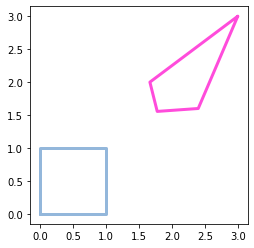

In [30]:
P = P/P[-1, :]
P = np.insert(P,4,P[:,0],axis=1)
x = P[0, :]
y = P[1, :]
Pt = Pt/Pt[-1, :]
Pt = np.insert(Pt,4,Pt[:,0],axis=1)
xt = Pt[0, :]
yt = Pt[1, :]
fig, ax = plt.subplots(1,1, sharex=True, sharey=True)
ax.plot(x, y, color='#6699cc', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')
ax.plot(xt, yt, color='#ff00cc', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')
saveto('Projective.eps')

# 2 2. Warping Using a Given Homography

In [31]:
im1 = cv.imread('../images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
saveimg('im1.png', im1)
im5 = cv.imread('../images/graf/img5.ppm', cv.IMREAD_ANYCOLOR)
saveimg('im5.png', im5)
with open('../images/graf/H1to5p') as f:
    H = [[float(x) for x in line.split()] for line in f]
print(H)
H = np.array(H)
im5_warped = cv.warpPerspective(im5, np.linalg.inv(H), (900,900))
saveimg('im5warped.png', im5_warped)
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
saveimg('im5warped2.png', im5_warped)

# cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
# cv.imshow("Image 1", im1)
# cv.waitKey(0)
# cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
# cv.imshow("Image 5", im5)
# cv.waitKey(0)
# cv.namedWindow("Image 5 Warped", cv.WINDOW_AUTOSIZE)
# cv.imshow("Image 5 Warped", im5_warped)
# cv.waitKey(0)
# cv.destroyAllWindows()

[[0.62544644, 0.057759174, 222.01217], [0.22240536, 1.1652147, -25.605611], [0.00049212545, -3.6542424e-05, 1.0]]


## 3. Computing the Homogrpahy Using Mouse-Clicked Points and Warping

In [32]:
#https://learnopencv.com/homography-examples-using-opencv-python-c/
import cv2 as cv
import numpy as np
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1
im1 = cv.imread('../images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('../images/graf/img4.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im4copy = im4.copy()
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)
while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
        
param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)
while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()

In [33]:
H, status = cv.findHomography(p1,p2)
H = np.array(H)
im4_warped = cv.warpPerspective(im4, np.linalg.inv(H), (900,900))
saveimg('im4warped.png', im4_warped)
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
saveimg('im4warped2.png', im4_warped)

In [34]:
print(H)
print(p1,p2)

[[ 6.59894211e-01  6.86220378e-01 -3.13000247e+01]
 [-1.50977725e-01  9.56863356e-01  1.52906596e+02]
 [ 4.12755346e-04 -1.98886486e-05  1.00000000e+00]]
[[157. 560.]
 [141. 130.]
 [544. 542.]
 [405. 209.]
 [682.  56.]] [[434. 631.]
 [143. 243.]
 [576. 486.]
 [325. 250.]
 [358.  81.]]


In [35]:
#Marking the Selected points on the images
im1 = cv.imread('../images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('../images/graf/img4.ppm', cv.IMREAD_ANYCOLOR)

for point in p1.astype(np.int32):
    cv.circle(im1, tuple(point), radius=8, color=(255, 255, 0), thickness=-1)
saveimg('im1points.png', im1)
for point in p2.astype(np.int32):
    cv.circle(im4, tuple(point), radius=8, color=(255, 255, 0), thickness=-1)
saveimg('im4points.png', im4)

## 4. Computing the Homogrpahy Using Mouse-Clicked Points without OpenCV

In [37]:
#============================ Normalization ======================
def normalizePoints(points):
    """
       Normalizing the point cloud(pre-conditioning) 
    """
    # Calculating the centroid of the points.
    centroid = sum(points)/len(points)
    # Calculating the scaling factor.
    total_dist = sum(np.sqrt(np.sum(((points - centroid)**2),axis = 1)))
    avg_dist  = total_dist/len(points)
    # For average distance from the origin to be sqrt(2) after scaling
    scale = np.sqrt(2)/avg_dist    
    # Defining Similarity transformation: translation and scaling
    xt, yt = centroid
    transform = np.array([[scale, 0, -xt*scale],
                          [0, scale, -yt*scale],
                          [0, 0,1]])
    # Making the points homogeneous by adding 1 at the end
    points = np.concatenate((points, np.ones((len(points),1))), axis =1)
    # Similarity transformation through matrix multiplication
    normalized_points = transform.dot(points.T).T
    return transform, normalized_points

#===================== Calculating homography ====================
def calcHomography(p1,p2):
    """
        The normalized DLT for 2D homographies.Given in the 
        Multiple View Geometry in Computer Vision Second Edition 
        by Richard Hartley & Andrew Zisserman. Algorithm 4.2 
    """
    # Normalizing the points using predefined function
    T1,p1 = normalizePoints(p1)
    T2,p2 = normalizePoints(p2)
    #Initialising an array to keep the coefficint matrix
    A = np.zeros((2*len(p1), 9))
    row = 0
    # Filling rows of the matrix according to the expressions
    for point1, point2 in zip(p1,p2):
        # Coefficients of the current row 
        A[row, 3:6] = -point2[2]*point1
        A[row, 6:9] =  point2[1]*point1
        # Coefficients of the next row 
        A[row+1, 0:3] =  point2[2]*point1
        A[row+1, 6:9] = -point2[0]*point1    
        row+=2    
    # Singular Value decomposition of A
    U, D, VT = np.linalg.svd(A)
    # unit singular vector corresponding to the smallest 
    # singular value, is the solution h. That is last column of V.
    # i.e. Last row of the V^T
    h =   VT[-1]
    # Reshaping to get 3x3 homography
    H = h.reshape((3,3))
    # Denormalization
    H = np.linalg.inv(T2).dot(H).dot(T1)
    H = H/H[-1,-1]
    return H

In [38]:
myH = calcHomography(p1,p2)
myH = np.array(myH)

In [39]:
im1 = cv.imread('../images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('../images/graf/img4.ppm', cv.IMREAD_ANYCOLOR)

im4_warped = cv.warpPerspective(im4, np.linalg.inv(myH), (900,900))
saveimg('myim4warped.png', im4_warped)
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
saveimg('myim4warped2.png', im4_warped)

for point in p1.astype(np.int32):
    cv.circle(im1, tuple(point), radius=8, color=(0, 255, 0), thickness=-1)
saveimg('myim1points.png', im1)
for point in p2.astype(np.int32):
    cv.circle(im4, tuple(point), radius=8, color=(0, 255, 0), thickness=-1)
saveimg('myim4points.png', im4)

In [40]:
print(myH)
print(p1,p2)

[[ 6.60355290e-01  6.85735356e-01 -3.13168167e+01]
 [-1.50699933e-01  9.56965356e-01  1.52763838e+02]
 [ 4.13108386e-04 -2.02092511e-05  1.00000000e+00]]
[[157. 560.]
 [141. 130.]
 [544. 542.]
 [405. 209.]
 [682.  56.]] [[434. 631.]
 [143. 243.]
 [576. 486.]
 [325. 250.]
 [358.  81.]]
